In [3]:
# import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("pcap_kpis_detailed.csv")

# Quick preview
df.head()


,file,node_type,network_type,total_packets,avg_pkt_size,std_pkt_size,min_pkt_size,max_pkt_size,avg_inter_pkt_time,std_inter_pkt_time,...,unique_src_ports,unique_dst_ports,unique_tos_values,avg_dscp,unique_dscp,non_zero_dscp,dscp_marking_ratio,dns_queries,dns_responses,dns_ratio
0,ap-wifi-5-1.pcap,unknown,unknown,1674,112.021505,83.167136,14,202,0.041743,0.049864,...,0,0,0,0.0,0,0,0.0,0,0,0.0
1,bot-wifi-0-6-1.pcap,bot,wifi,203,79.280788,44.311759,14,134,0.222251,1.560268,...,0,0,0,0.0,0,0,0.0,0,0,0.0
2,bot-wifi-1-8-1.pcap,bot,wifi,270,78.370370,43.502191,14,134,0.166903,1.355483,...,0,0,0,0.0,0,0,0.0,0,0,0.0
3,bot-wifi-10-24-1.pcap,bot,wifi,1349,131.399555,80.071306,14,202,0.051808,0.050639,...,0,0,0,0.0,0,0,0.0,0,0,0.0
4,bot-wifi-11-25-1.pcap,bot,wifi,1488,121.737231,82.468869,14,202,0.046965,0.050517,...,0,0,0,0.0,0,0,0.0,0,0,0.0


# Distributions

## avg_pkt_size distribution (first plot)

 - Humans likely generate a wider range of packet sizes due to varied application use

## avg_inter_pkt_time (second plot)

 - Humans are potentially more likely to have long idle intervals

 - Bots usually operate at very consistent timing

## pkt_size_entropy (third plot)

 - High entropy
   - diverse packet sizes
   - likely human

 - Low entropy
   - repetitive sizes
   - likely bot or automated tools


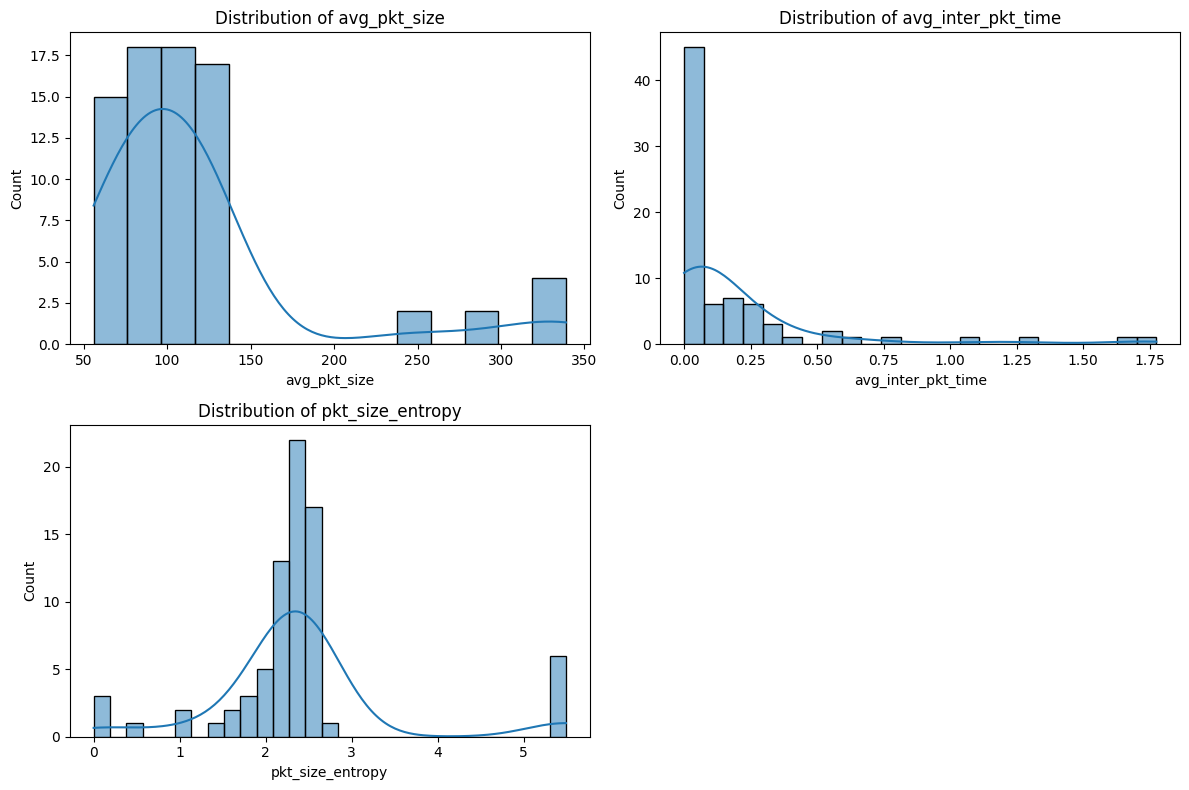

In [4]:
hist_cols = [
    "avg_pkt_size",
    "avg_inter_pkt_time",
    "pkt_size_entropy"
]

plt.figure(figsize=(12, 8))
for i, col in enumerate(hist_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


# boxplots

## avg_pkt_size (plot one)

 - Humans show larger spread and higher outliers

 - Bots have smaller, more compact values

So, Humans send more varied and sometimes larger packets

## timing_regularity (plot two)

 - Bots appear slightly more regular

 - Humans slightly less regular

As expected, bots tend to send packets on predictable schedules

## burst_factor (plot three)

 - Humans show higher max burstiness

 - Bots stay within lower, narrower ranges

Human applications produce more extreme bursts 
 - scrolling, streaming, page loads

## pkt_size_entropy (plot four)

Humans 
 - higher variability in packet sizes
Bots 
 - repetitive behavior
 - low entropy

## avg_inter_pkt_time (plot five)

Bots are more predictable
 - Bots exhibit more uniform behavior
   - Narrow packet-size range
   - Lower entropy
   - More regular timing

Humans generate more bursty, unpredictable traffic
 - Higher variance
 - Outliers in packet sizes, timing, and entropy
 - Bursts in packets-per-second

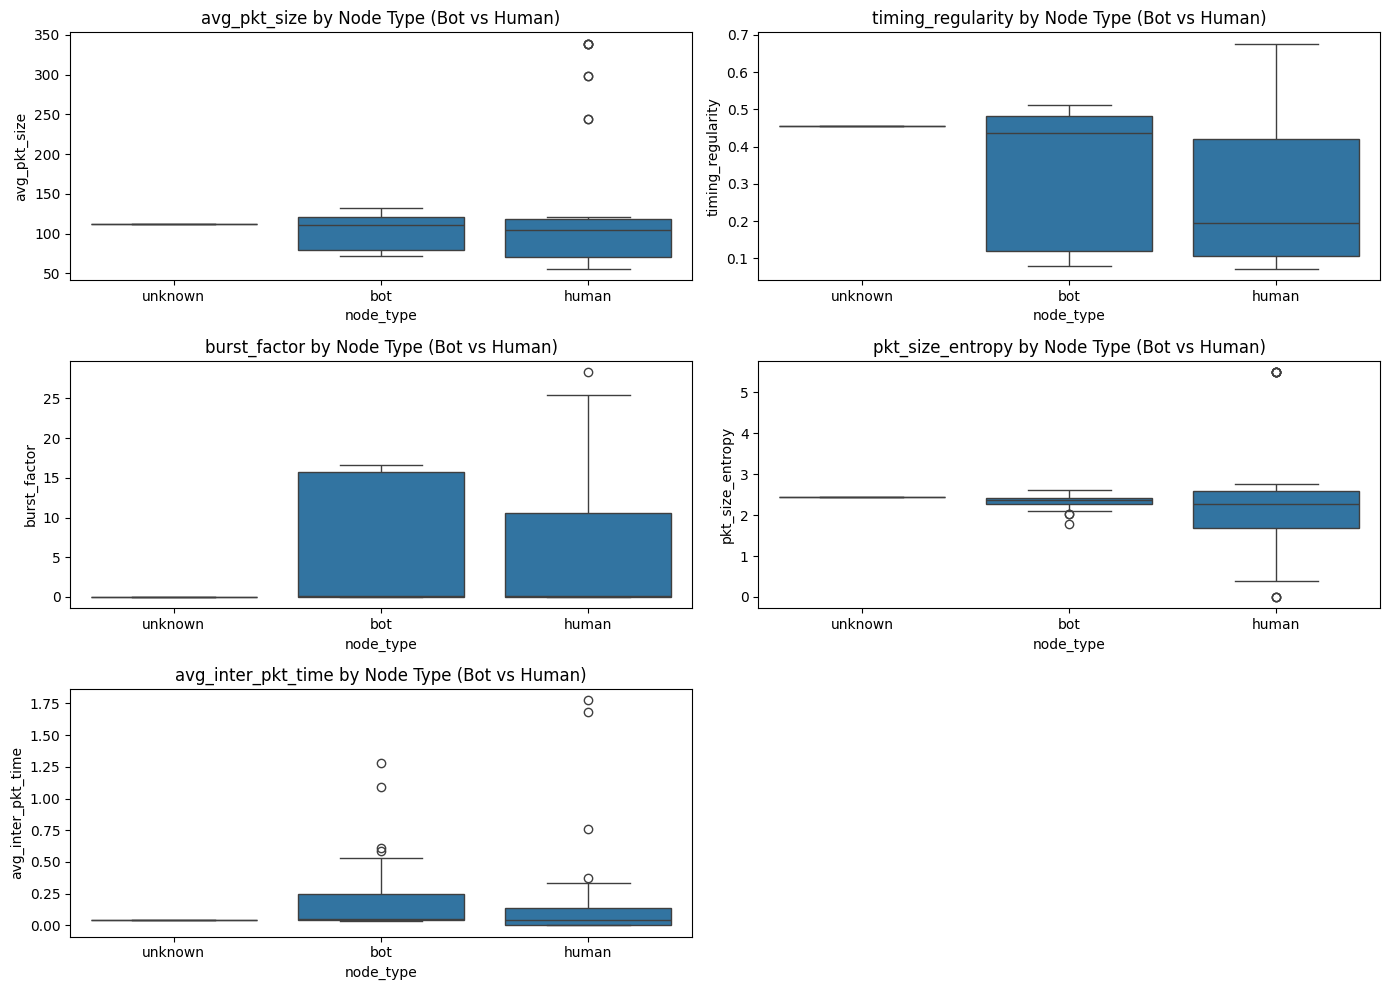

In [5]:
boxplot_cols = [
    "avg_pkt_size",
    "timing_regularity",
    "burst_factor",
    "pkt_size_entropy",
    "avg_inter_pkt_time"
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(boxplot_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x="node_type", y=col)
    plt.title(f"{col} by Node Type (Bot vs Human)")
plt.tight_layout()
plt.show()


# bot/human analysis stats

In [6]:
bot_stats = df[df["node_type"] == "bot"].describe()
human_stats = df[df["node_type"] == "human"].describe()

bot_stats, human_stats


(       total_packets  avg_pkt_size  std_pkt_size  min_pkt_size  max_pkt_size  \
 count      39.000000     39.000000     39.000000          39.0     39.000000   
 mean      973.025641    102.903571     63.604964          14.0    172.358974   
 std       724.726064     21.487941     19.235251           0.0     34.160216   
 min        36.000000     71.712766     32.909598          14.0    134.000000   
 25%       184.000000     79.511238     43.430029          14.0    134.000000   
 50%      1353.000000    111.440303     77.393367          14.0    202.000000   
 75%      1523.000000    121.553963     80.816425          14.0    202.000000   
 max      2152.000000    132.528158     83.422311          14.0    202.000000   
 
        avg_inter_pkt_time  std_inter_pkt_time  min_inter_pkt_time  \
 count           39.000000           39.000000           39.000000   
 mean             0.198644            1.028035            0.000049   
 std              0.280384            1.297092            0

In [7]:
features = [
    "avg_inter_pkt_time", "timing_regularity", "timing_cv", "burst_factor",
    "pkt_size_entropy", "src_port_entropy", "dst_port_entropy",
    "tcp_syn_count", "tcp_fin_count", "tcp_rst_count",
    "tcp_ratio", "udp_ratio"
]

df.groupby("node_type")[features].mean().T


node_type,bot,human,unknown
avg_inter_pkt_time,0.198644,0.190585,0.041743
timing_regularity,0.323166,0.244488,0.455677
timing_cv,3.775988,5.153294,1.194538
burst_factor,6.474669,5.970972,0.059565
pkt_size_entropy,2.335637,2.473417,2.449177
src_port_entropy,0.000000,0.158240,0.000000
dst_port_entropy,0.000000,0.158609,0.000000
tcp_syn_count,0.000000,41.555556,0.000000
tcp_fin_count,0.000000,0.000000,0.000000
tcp_rst_count,0.000000,0.000000,0.000000


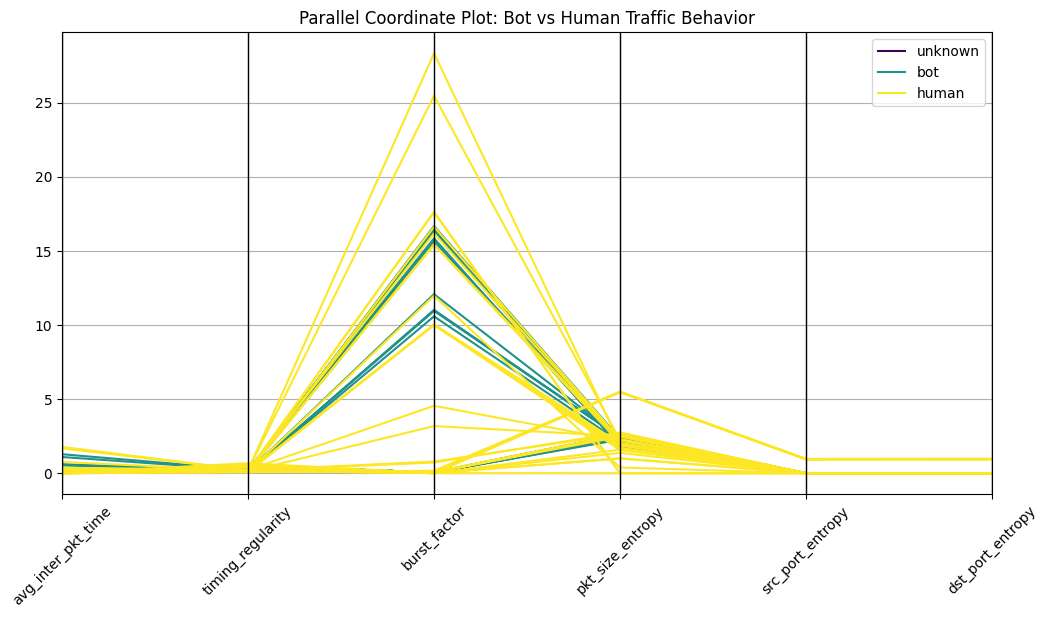

In [8]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

pcp_df = df[[
    "node_type",
    "avg_inter_pkt_time",
    "timing_regularity",
    "burst_factor",
    "pkt_size_entropy",
    "src_port_entropy",
    "dst_port_entropy"
]]

plt.figure(figsize=(12,6))
parallel_coordinates(pcp_df, "node_type", colormap="viridis")
plt.title("Parallel Coordinate Plot: Bot vs Human Traffic Behavior")
plt.xticks(rotation=45)
plt.show()


# wifi vs 5g

## Packets per Second (WiFi vs 5G) (plot one)

- 5G networks tend to support higher stable throughput

- WiFi throughput varies more depending on interference, router load, and signal quality

## Average Inter-Packet Time (Latency pattern) (plot two)

- WiFi shows higher latency and more jitter, which can be expected due to:

    - Shared medium

    - Contention

    - Variable signal strength

- 5G has very low inter-packet time
- packets come in rapid succession
    - low latency

## Burst Factor (plot three)

- WiFi traffic often arrives in bursts due to:

    - MAC-level retransmissions

    - Buffering

    - Random backoff

 - 5G is designed for smooth, high-bandwidth, low-jitter delivery, so bursts flatten out

## Timing CV (Coefficient of Variation) (plot four)

- WiFi has inconsistent timing yet sometimes stable flow
    - CV near 0 for some sessions

- 5G consistently shows very high timing variability
    - CV > 5 for all samples

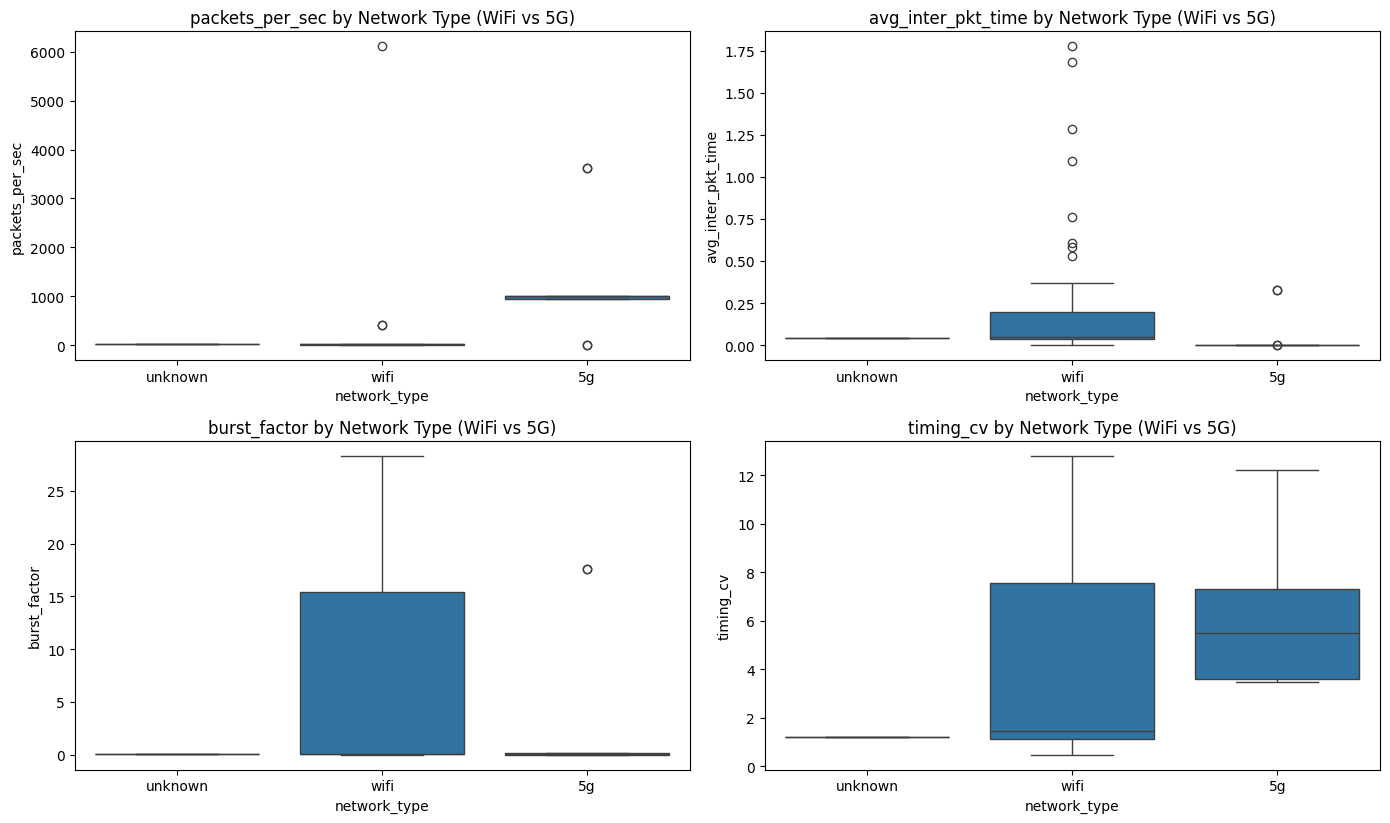

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

compare_cols = [
    "packets_per_sec",
    "avg_inter_pkt_time",
    "burst_factor",
    "timing_cv",
]

plt.figure(figsize=(14, 12))
for i, col in enumerate(compare_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x="network_type", y=col)
    plt.title(f"{col} by Network Type (WiFi vs 5G)")
plt.tight_layout()
plt.show()


# Overall, we can conclude

## WiFi Traffic

- More bursty

- Higher latency, larger idle gaps

- More throughput variability

- Very low TTL
    - local LAN traffic

- Timing CV lower on average
    - possibly due to bots

## 5G Traffic

- High stable throughput
    - near 900 pps cluster

- Very low inter-packet times
    - low latency

- Low burstiness

- Very high TTL
    - ~63

- Timing CV surprisingly high
    - likely due to human-generated irregular traffic
